In [ ]:
''' 
Aim: Implement Boltzmann machines and explore their applications in
modelling complex data distributions.

Boltzmann Machines (BMs) are a class of probabilistic generative models that use a
network of interconnected units (neurons) to model complex data distributions. 
They are energybased models that learn a distribution over inputs.

A BM consists of visible units (representing observed data) and hidden units
(representing latent factors). These units are connected symmetrically, and each connection has
an associated weight.

The model uses an energy function to represent the system's state. The goal is
to minimize the energy to find the most probable configurations of the units, representing the
learned data distribution.

Boltzmann Machines learn by adjusting weights to minimize the difference between
the model’s output distribution and the true data distribution using techniques like contrastive
divergence.
'''

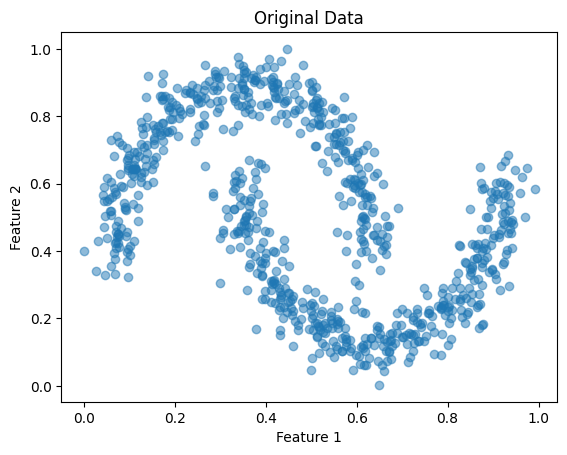

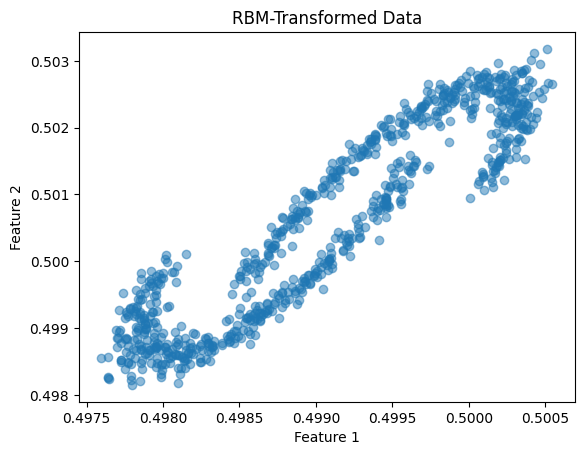

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import BernoulliRBM
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

def generate_synthetic_data():
    """Generates a synthetic dataset using the make_moons function."""
    # Create a 2D dataset with two interleaving half circles (moon shapes)
    X, y = make_moons(n_samples=1000, noise=0.1, random_state=42)
    # Normalize the data to bring all values into the range [0, 1]
    X = MinMaxScaler().fit_transform(X)
    # Split the dataset into training and testing sets (80% train, 20% test)
    return train_test_split(X, y, test_size=0.2, random_state=42)

def train_rbm(X_train, n_components=2, learning_rate=0.01, n_iter=10):
    """Trains a Restricted Boltzmann Machine (RBM)."""
    # Initialize the RBM with specified components (hidden units), learning rate, and iterations
    rbm = BernoulliRBM(n_components=n_components, learning_rate=learning_rate, n_iter=n_iter, random_state=42)
    # Train the RBM on the training dataset
    rbm.fit(X_train)
    return rbm

def visualize_data(X, title="Data Visualization"):
    """Visualizes 2D data points."""
    # Scatter plot for data points
    plt.scatter(X[:, 0], X[:, 1], alpha=0.5)
    plt.title(title) # Set plot title
    plt.xlabel("Feature 1") # Label x-axis
    plt.ylabel("Feature 2") # Label y-axis
    plt.show() # Display the plot

def main():
    # Generate synthetic dataset
    X_train, X_test, y_train, y_test = generate_synthetic_data()
    # Visualize the original dataset before applying RBM
    visualize_data(X_train, title="Original Data")
    # Train the RBM model
    rbm = train_rbm(X_train)
    # Transform the data using the trained RBM (feature extraction)
    transformed_data = rbm.transform(X_train)
    # Visualize the transformed dataset after applying RBM
    visualize_data(transformed_data, title="RBM-Transformed Data")

# Execute the main function when the script is run
if __name__ == "__main__":
    main()